In [1]:
def fractional_knapsack(rewards, prob, c):
    n = len(rewards)  
    print(n)# Nombre d'objets disponibles
    #packets = list(range(1, n+1))
    packets = sorted(range(n), key=lambda j: rewards[j], reverse=True)
  # Crée une liste de numéros d'objets
    print(packets)
    # Trie les objets en fonction de leurs récompenses, en ordre décroissant
    
    sommePoid = 0  # Somme des poids/probabilités des objets sélectionnés
    policy = [0] * n  # Politique de sélection initiale (aucun objet sélectionné)

    # Parcourt chaque objet trié par récompense
    for packet in packets:
        # Vérifie si l'ajout de cet objet ne dépasse pas la capacité maximale
        if sommePoid + prob[packet] <= c:
            policy[packet] = 1  # Sélectionne l'objet entièrement
            sommePoid += prob[packet]  # Ajoute son poids à la somme totale
        else:
            # Si l'ajout complet dépasse la capacité, sélectionne une partie de l'objet
            policy[packet] = (c - sommePoid) / prob[packet]
            break  # Arrête la sélection car la capacité est atteinte

    return policy  # Retourne la politique de sélection optimale

# Exemple d'application
rewards = [100, 50, 10, 1]
prob = [1/3, 1/12, 1/4, 1/3]
c = 0.5
policy = fractional_knapsack(rewards, prob, c)
print("Optimal policy:", policy)

4
[0, 1, 2, 3]
Optimal policy: [1, 1, 0.3333333333333335, 0]


In [2]:
import math
from math import floor

def policies(N, alpha):
    """
    Calcul de la politique optimale pour une valeur alpha donnée.
    
    :param N: Nombre total de classes (par défaut 4).
    :param alpha: Seuil de contrôle (alpha).
    :return: Liste des politiques pour chaque classe.
    """
    val = floor(alpha)  # Partie entière de alpha
    policy = [0.0] * N  # Initialisation de la politique avec des zéros

    for i in range(N):
        if val > i:  # Si alpha est supérieur à l'indice
            policy[i] = 1.0
        elif val == i:  # Si alpha est dans la classe partiellement
            policy[i] = alpha - i
        else:  # Si alpha est inférieur à l'indice
            policy[i] = 0.0

    return policy


In [3]:
alpha = 2.5
N = 4
policy = policies(N, alpha)
print("Politique calculée :", policy)


Politique calculée : [1.0, 1.0, 0.5, 0.0]


In [4]:
probabilities=[1/3, 1/12, 1/4, 1/3]
lmbda = 1e5

In [5]:
import random
import numpy as np 
def estimationY( alpha):
    """
    Estimation du flux de paquets admis en moyenne.
    
    :param alpha: Seuil courant d'admission.
    :return: Taux moyen de paquets admis.
    """
     # Nécessaire pour utiliser random.random()

    accepted_rate = 0  # Initialisation du taux d'acceptation
    m = np.random.poisson(lam=lmbda)  # Générer le nombre total de paquets arrivant (processus de Poisson)
    print(m)
    # Calcul de la politique optimale via Fractional Knapsack
    policy = policies(N=4, alpha=alpha)

    # Générer les classes des paquets selon les probabilités
    packet_classes = np.random.choice(range(len(probabilities)), size=m, p=probabilities)
    print(packet_classes)
    accepted = 0  # Nombre total de paquets acceptés

    for p in packet_classes:
        if policy[p] == 1:  # Si la politique admet entièrement cette classe
            accepted += 1
        elif 0 < policy[p] < 1:  # Si la politique admet partiellement cette classe
            if random.random() < policy[p]:  # Probabilité d'accepter ce paquet
                accepted += 1
        # Si policy[p] == 0, on ne fait rien (le paquet n'est pas accepté)

    # Calculer le taux moyen de paquets admis
    accepted_rate = accepted / m if m > 0 else 0  # Éviter la division par zéro

    return accepted_rate


100182
[1 0 0 ... 3 2 2]
100338
[3 3 1 ... 0 0 0]
99767
[3 0 2 ... 3 2 0]
99797
[0 0 3 ... 2 3 1]
99731
[2 3 0 ... 0 0 0]
100389
[3 0 3 ... 1 2 2]
99922
[2 3 3 ... 3 0 3]
99743
[1 2 0 ... 0 3 0]
100144
[3 3 3 ... 3 2 3]
100132
[1 3 2 ... 2 2 0]
99844
[0 1 0 ... 0 1 3]
99990
[0 3 3 ... 3 2 0]
99656
[0 0 3 ... 0 0 3]
99674
[0 0 2 ... 2 0 3]
99735
[3 3 0 ... 0 3 0]
99920
[0 3 0 ... 3 2 3]
100108
[0 2 0 ... 3 0 0]
100328
[0 0 2 ... 0 3 3]
100027
[1 0 1 ... 3 0 3]
100596
[3 3 3 ... 3 2 2]
100006
[2 0 1 ... 2 3 1]
100300
[0 3 3 ... 3 0 0]
99747
[0 3 3 ... 3 0 3]
100248
[2 0 2 ... 3 3 0]
99993
[3 2 3 ... 2 3 0]
99930
[0 2 2 ... 2 3 3]
100408
[0 3 0 ... 3 2 2]
99833
[3 2 0 ... 0 0 3]
99657
[2 1 0 ... 3 0 0]
99998
[3 3 0 ... 0 2 2]
100179
[1 3 0 ... 3 2 0]
100126
[1 2 3 ... 3 1 3]
99571
[2 0 2 ... 3 0 2]
100085
[0 3 0 ... 0 3 2]
100278
[2 3 3 ... 2 2 0]
99554
[0 3 3 ... 0 3 3]
99891
[2 2 2 ... 2 3 3]
100129
[0 3 2 ... 1 0 3]
99886
[0 0 2 ... 3 2 2]
99853
[3 0 2 ... 2 3 2]
100218
[0 2 2 ... 1 3 

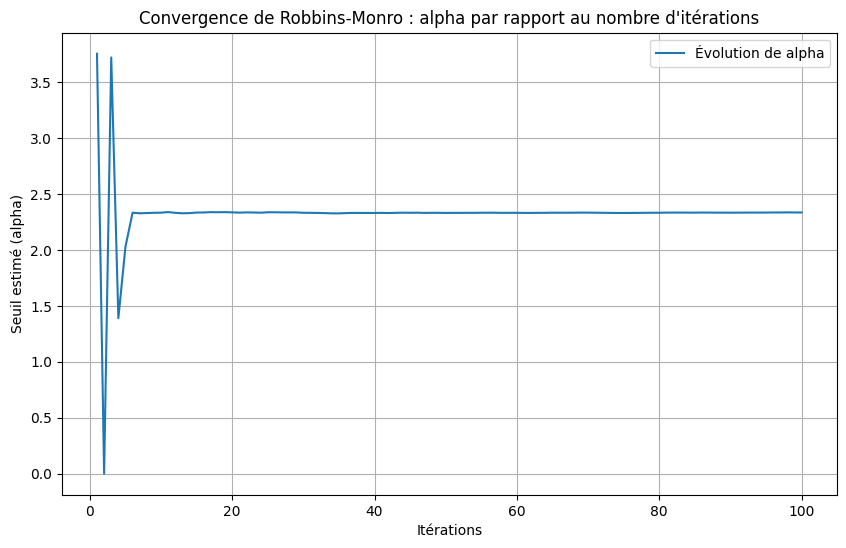

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def robbins_monro(alpha_init, capacity, num_iterations, epsilon_0, gamma):
    """
    Implémente l'algorithme de Robbins-Monro avec des pas décroissants.

    :param alpha_init: Valeur initiale du seuil alpha.
    :param capacity: Capacité cible du canal (c).
    :param num_iterations: Nombre total d'itérations (m).
    :param epsilon_0: Pas initial.
    :param gamma: Facteur de décroissance (1/2 < gamma <= 1).
    :return: Liste des seuils alpha ajustés à chaque itération.
    """
    # Initialisation
    alpha = alpha_init  # Initialisation du seuil
    alpha_history = []  # Historique des seuils

    for m in range(1, num_iterations + 1):
        # Calcul de la politique pour le seuil courant

        # Estimation de Z_m(alpha) (flux moyen de paquets admis)
        Z_m = estimationY(alpha)

        # Calcul du pas décroissant
        epsilon_m = epsilon_0 / (m ** gamma)

        # Mise à jour de alpha selon Robbins-Monro
        alpha = alpha + epsilon_m * (capacity - Z_m)

        # Projeter alpha dans l'intervalle [0, N] pour rester cohérent avec les politiques
        alpha = max(0, min(alpha, 4))

        # Ajouter le seuil courant à l'historique
        alpha_history.append(alpha)

    return alpha_history

# Paramètres du problème
alpha_init = 2  # Seuil initial
capacity = 0.5  # Capacité cible
num_iterations = 100  # Nombre total d'itérations
epsilon_0 = 20 # Pas initial
gamma = 0.9  # Facteur de décroissance (1/2 < gamma <= 1)

# Exécution de l'algorithme Robbins-Monro
alpha_history = robbins_monro(alpha_init, capacity, num_iterations, epsilon_0, gamma)

# Affichage des résultats
print("Dernier seuil estimé :", alpha_history[-1])

# Affichage de l'évolution de alpha
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), alpha_history, label="Évolution de alpha")
plt.xlabel("Itérations")
plt.ylabel("Seuil estimé (alpha)")
plt.title("Convergence de Robbins-Monro : alpha par rapport au nombre d'itérations")
plt.legend()
plt.grid(True)
plt.show()


100780
[2 0 3 ... 0 1 3]
99803
[0 3 3 ... 3 2 2]
99933
[2 0 2 ... 2 2 0]
99647
[2 2 2 ... 0 3 3]
99800
[0 3 0 ... 1 2 3]
100072
[2 3 2 ... 0 0 2]
100202
[3 0 2 ... 2 2 0]
100137
[0 0 3 ... 2 0 0]
100066
[0 2 3 ... 0 2 2]
99822
[3 3 1 ... 2 3 0]
99438
[3 3 2 ... 0 2 0]
99881
[3 3 0 ... 3 2 0]
100282
[0 0 0 ... 0 3 0]
99929
[3 3 0 ... 0 2 3]
99545
[0 3 3 ... 0 1 3]
99962
[0 3 3 ... 3 2 3]
100243
[1 2 3 ... 0 3 0]
100237
[3 3 3 ... 2 0 3]
100599
[3 2 2 ... 3 0 3]
99707
[0 3 0 ... 3 2 2]
99869
[3 2 2 ... 2 0 2]
99696
[3 0 2 ... 3 0 0]
99848
[3 3 1 ... 2 3 3]
99698
[0 2 1 ... 3 2 3]
99777
[1 3 0 ... 3 0 0]
99581
[2 3 3 ... 2 3 1]
99896
[2 0 2 ... 0 3 2]
99921
[1 0 0 ... 0 2 0]
100188
[0 3 0 ... 0 2 3]
99984
[3 0 2 ... 3 3 2]
99596
[2 2 3 ... 0 3 3]
99858
[3 0 0 ... 3 3 1]
100158
[3 2 0 ... 0 0 3]
100712
[3 3 0 ... 2 3 1]
99820
[0 2 0 ... 3 1 3]
99485
[3 0 0 ... 3 3 3]
100457
[0 0 2 ... 1 3 3]
99984
[2 0 0 ... 3 2 3]
99739
[3 3 2 ... 0 3 3]
99409
[0 1 3 ... 3 3 3]
100357
[2 0 2 ... 2 2 0]
99

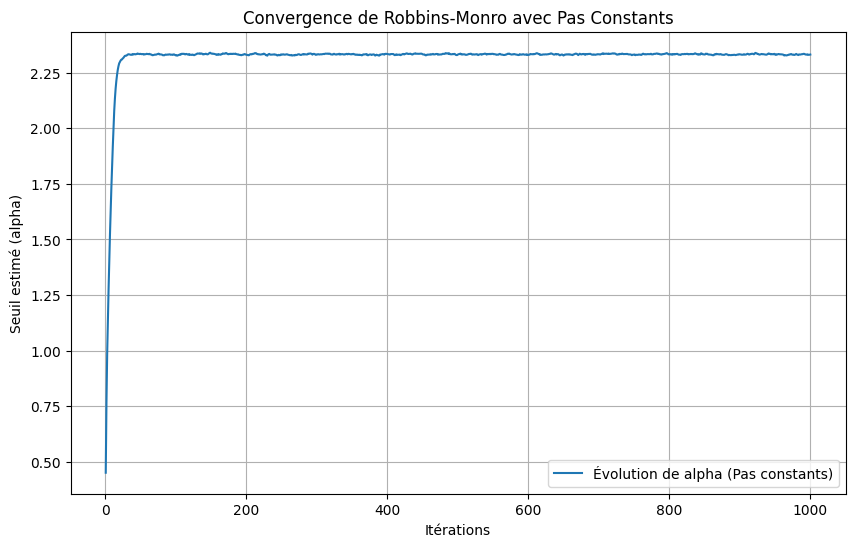

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def robbins_monro_constant_steps(alpha_init, capacity, num_iterations, epsilon):
    """
    Implémente l'algorithme de Robbins-Monro avec des pas constants.

    :param alpha_init: Valeur initiale du seuil alpha.
    :param capacity: Capacité cible du canal (c).
    :param num_iterations: Nombre total d'itérations.
    :param epsilon: Pas constant.
    :return: Liste des seuils alpha ajustés à chaque itération.
    """
    # Initialisation
    alpha = alpha_init  # Initialisation du seuil
    alpha_history = []  # Historique des seuils

    for m in range(1, num_iterations + 1):
        # Calcul de la politique pour le seuil courant
        policy = policies(N=4, alpha=alpha)

        # Estimation de Z_m(alpha) (flux moyen de paquets admis)
        Z_m = estimationY(alpha)

        # Mise à jour de alpha selon Robbins-Monro (pas constant)
        alpha = alpha + epsilon * (capacity - Z_m)

        # Projeter alpha dans l'intervalle [0, N] pour rester cohérent avec les politiques
        alpha = max(0, min(alpha, 4))

        # Ajouter le seuil courant à l'historique
        alpha_history.append(alpha)

    return alpha_history

# Paramètres du problème
alpha_init = 0  # Seuil initial
capacity = 0.5  # Capacité cible
num_iterations = 1000  # Nombre total d'itérations
epsilon = 0.9  # Pas constant

# Exécution de l'algorithme Robbins-Monro avec pas constants
alpha_history_constant = robbins_monro_constant_steps(alpha_init, capacity, num_iterations, epsilon)

# Affichage des résultats
print("Dernier seuil estimé :", alpha_history_constant[-1])

# Affichage de l'évolution de alpha
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), alpha_history_constant, label="Évolution de alpha (Pas constants)")
plt.xlabel("Itérations")
plt.ylabel("Seuil estimé (alpha)")
plt.title("Convergence de Robbins-Monro avec Pas Constants")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
def robbins_monro_polyak(alpha_init, capacity, num_iterations, epsilon_0, gamma):
    """
    Implémente l'algorithme de Robbins-Monro avec des pas décroissants et Polyak Averages.

    :param alpha_init: Valeur initiale du seuil alpha.
    :param capacity: Capacité cible du canal (c).
    :param num_iterations: Nombre total d'itérations.
    :param epsilon_0: Pas initial.
    :param gamma: Facteur de décroissance (1/2 < gamma <= 1).
    :return: Liste des seuils alpha ajustés et des moyennes Polyak.
    """
    # Initialisation
    alpha = alpha_init  # Initialisation du seuil
    alpha_history = []  # Historique des seuils
    polyak_averages = []  # Historique des moyennes Polyak
    cumulative_alpha = 0  # Cumul des seuils pour calculer les moyennes Polyak

    for m in range(1, num_iterations + 1):
        # Calcul de la politique pour le seuil courant

        # Estimation de Z_m(alpha) (flux moyen de paquets admis)
        Z_m = estimationY(alpha)

        # Calcul du pas décroissant
        epsilon_m = epsilon_0 / (m ** gamma)

        # Mise à jour de alpha selon Robbins-Monro
        alpha = alpha + epsilon_m * (capacity - Z_m)

        # Projeter alpha dans l'intervalle [0, N] pour rester cohérent avec les politiques
        alpha = max(0, min(alpha, 4))

        # Ajouter le seuil courant à l'historique
        alpha_history.append(alpha)

        # Mise à jour des moyennes Polyak
        cumulative_alpha += alpha
        polyak_average = cumulative_alpha / m  # Moyenne cumulative
        polyak_averages.append(polyak_average)

    return alpha_history, polyak_averages

99790
[3 0 1 ... 3 0 3]
100156
[0 0 3 ... 0 0 2]
99547
[2 0 3 ... 1 2 3]
99964
[0 0 3 ... 0 3 2]
99927
[0 3 3 ... 0 0 2]
100296
[3 0 0 ... 1 3 3]
99536
[0 3 2 ... 2 3 2]
99689
[3 1 3 ... 2 2 2]
99951
[0 3 1 ... 3 1 3]
99644
[3 0 0 ... 3 0 0]
100039
[1 3 3 ... 2 2 2]
99719
[2 0 1 ... 3 2 0]
100064
[2 0 1 ... 3 3 3]
99598
[0 3 0 ... 0 0 2]
100407
[0 2 3 ... 3 0 2]
99866
[3 0 2 ... 0 1 0]
100207
[0 2 2 ... 2 1 3]
99728
[0 2 0 ... 0 0 1]
100082
[1 0 0 ... 3 3 1]
99802
[3 3 3 ... 3 0 0]
100147
[3 2 0 ... 0 1 0]
99940
[0 2 2 ... 3 0 3]
100023
[3 2 0 ... 1 0 0]
99763
[3 0 1 ... 2 2 3]
99551
[3 0 3 ... 1 0 1]
99970
[0 3 2 ... 3 3 0]
99691
[2 3 0 ... 3 1 3]
100102
[2 3 0 ... 1 3 0]
100043
[3 2 1 ... 2 2 3]
99921
[0 1 3 ... 3 2 2]
99298
[3 2 3 ... 2 3 0]
99927
[3 3 3 ... 3 2 0]
99851
[2 2 3 ... 2 2 3]
99852
[3 3 3 ... 2 3 0]
99644
[2 0 3 ... 1 0 3]
99602
[2 0 0 ... 0 2 3]
100026
[3 3 0 ... 1 0 0]
100261
[3 3 3 ... 1 0 3]
100076
[0 3 3 ... 3 2 0]
100462
[3 0 0 ... 3 2 0]
100028
[3 3 0 ... 0 0 1]


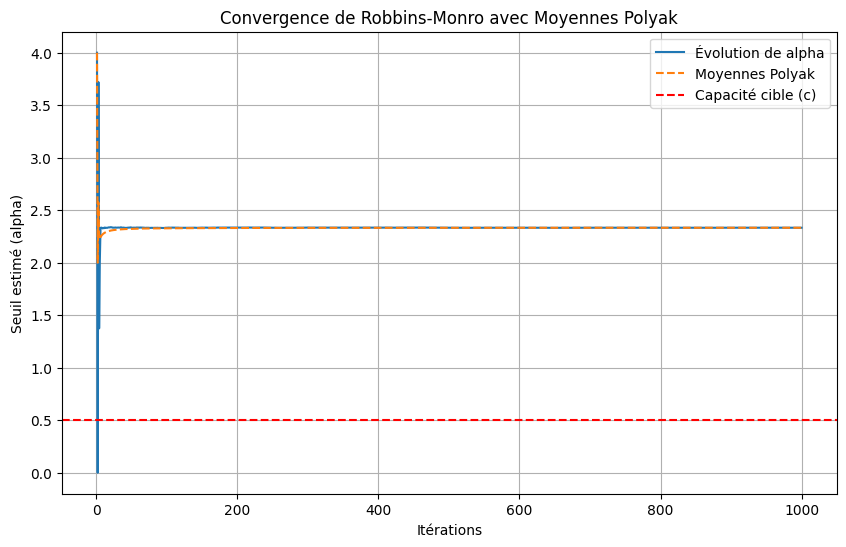

In [9]:
alpha_history, polyak_averages = robbins_monro_polyak(alpha_init, capacity, num_iterations, epsilon_0, gamma)

# Affichage des résultats
print("Dernier seuil estimé :", alpha_history[-1])
print("Dernière moyenne Polyak :", polyak_averages[-1])

# Affichage de l'évolution de alpha et des moyennes Polyak
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), alpha_history, label="Évolution de alpha")
plt.plot(range(1, num_iterations + 1), polyak_averages, label="Moyennes Polyak", linestyle="--")
plt.axhline(y=capacity, color='r', linestyle='--', label="Capacité cible (c)")
plt.xlabel("Itérations")
plt.ylabel("Seuil estimé (alpha)")
plt.title("Convergence de Robbins-Monro avec Moyennes Polyak")
plt.legend()
plt.grid(True)
plt.show()